In [1]:
import pandas as pd
import servicex as sx
from func_adl_servicex import ServiceXSourceUpROOT
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200 # make figures bigger and more readable

In [2]:
dataset_name = "cms:DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8/RunIIAutumn18NanoAODv7-Nano02Apr2020_102X_upgrade2018_realistic_v21_ext2-v1/NANOAODSIM"
sx_dataset = sx.ServiceXDataset(dataset_name, "uproot")
ds = ServiceXSourceUpROOT(sx_dataset, "Events")


filtered_jet_pT = ds.SelectMany(lambda event: {'pT': event.Jet_pt, 'eta': event.Jet_eta}.Zip()
                                              .Where(lambda jet: abs(jet.eta) < 1)
                                              .Select(lambda jet: jet.pT)).AsAwkwardArray().value()

In [3]:
filtered_jet_pT

<Array [50.5, 49.4, 24.3, ... 21.8, 61.8, 25.2] type='239719308 * float32'>

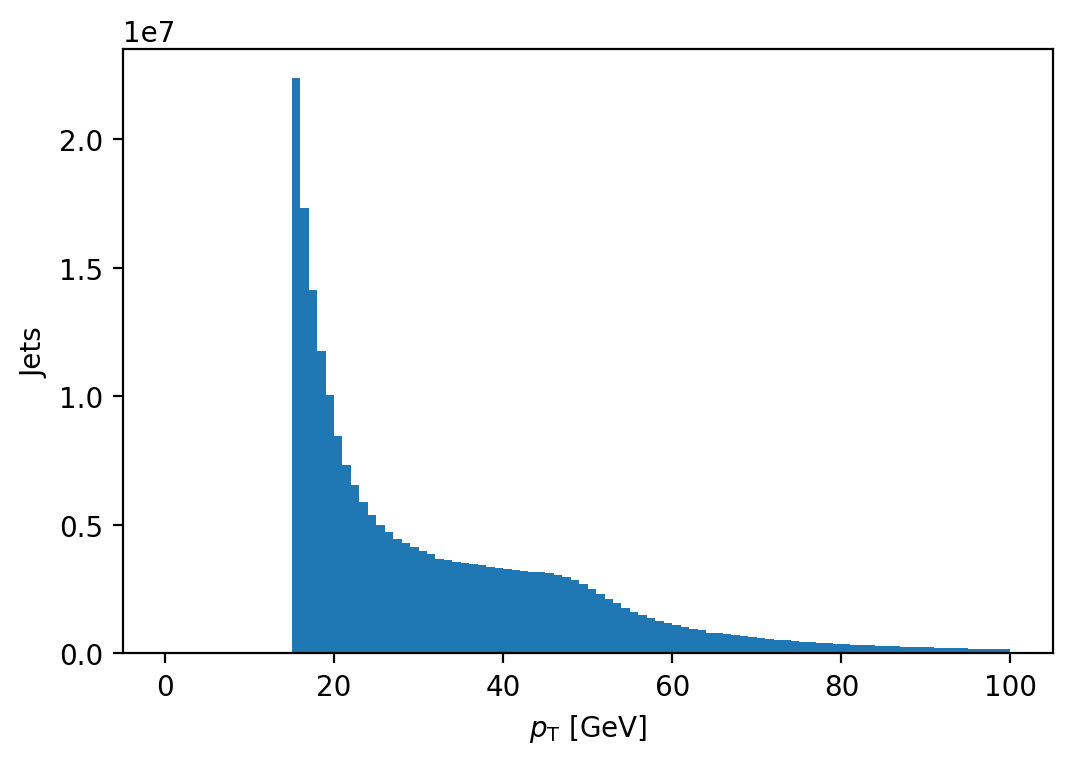

In [4]:
plt.hist([filtered_jet_pT], bins=100, range=(0, 100))
plt.xlabel(r'$p_\mathrm{T}$ [GeV]')
plt.ylabel('Jets')
plt.show()